## Our Analysis based on Lancet Report 

#### Ref : Ambient air pollution and daily mortality in ten cities of India: a causal modelling study

## Data collected form Lancet report

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Your data
data = {
    "City": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Ahmedabad", "Bangalore", "Hyderabad", "Pune", "Varanasi", "Shimla"],
    "PM2.5 (mg/m³)": [113.0, 41.7, 55.2, 33.7, 37.9, 33.0, 38.9, 45.3, 82.1, 28.4],
    "Deaths per year": [11964, 5091, 4678, 2870, 2495, 2102, 1597, 1367, 831, 59]
}

# Creating DataFrame
df = pd.DataFrame(data)


## Generating a Scatter chart

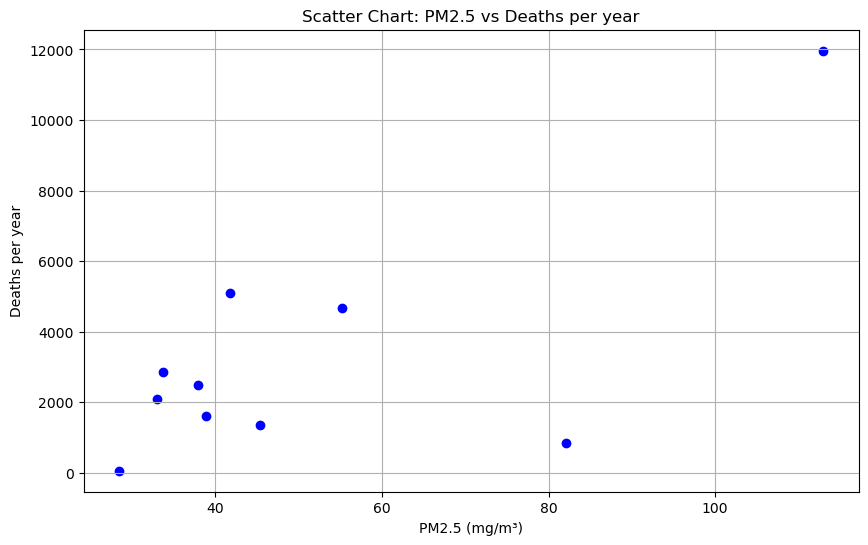

,PM2.5 (mg/m³),Deaths per year
PM2.5 (mg/m³),1.000000,0.722217
Deaths per year,0.722217,1.000000


In [9]:

# Plotting scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(df["PM2.5 (mg/m³)"], df["Deaths per year"], color='b')
plt.title('Scatter Chart: PM2.5 vs Deaths per year')
plt.xlabel('PM2.5 (mg/m³)')
plt.ylabel('Deaths per year')
plt.grid(True)
plt.show()

# Calculating correlation
df.corr(method='pearson', numeric_only=True, min_periods=1)

correlation


## Generating a linear regression plot

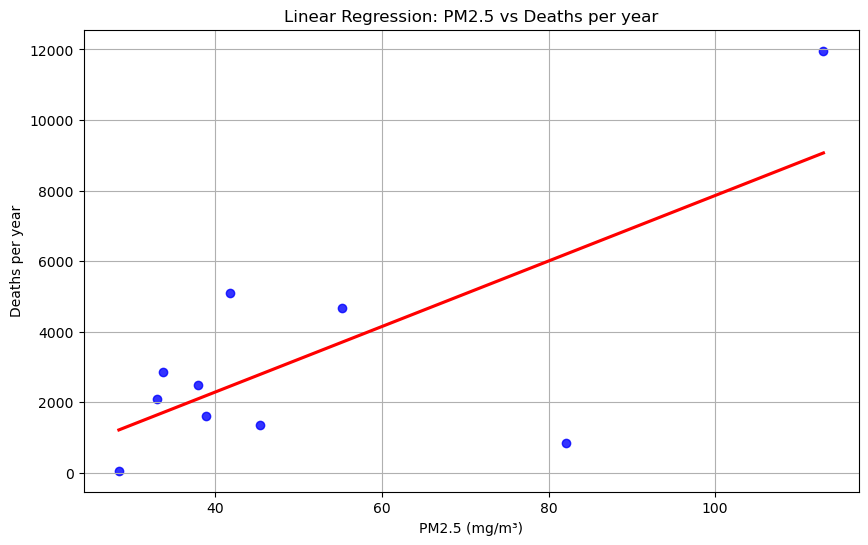

In [10]:
import seaborn as sns

# Plotting linear regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x=df["PM2.5 (mg/m³)"], y=df["Deaths per year"], ci=None, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Linear Regression: PM2.5 vs Deaths per year')
plt.xlabel('PM2.5 (mg/m³)')
plt.ylabel('Deaths per year')
plt.grid(True)
plt.show()


## Displaying a shaded area for 95% connfidence interval

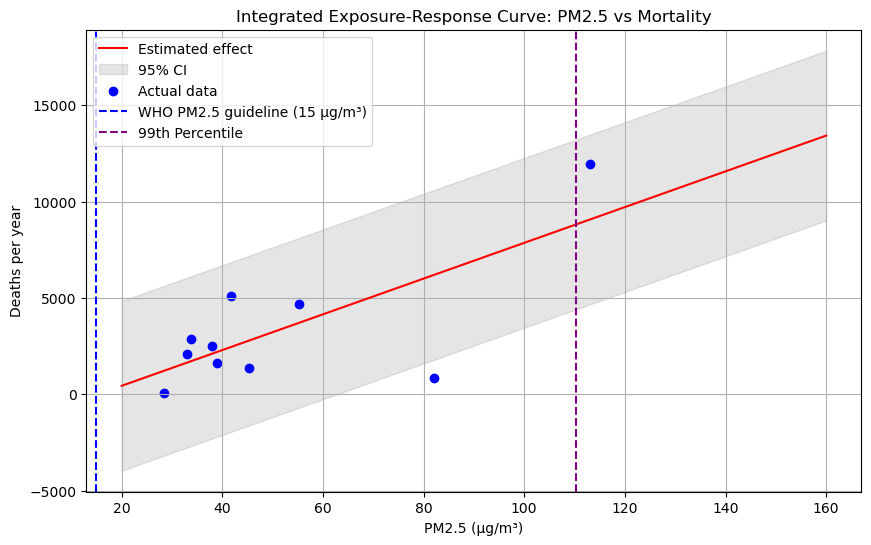

In [14]:
# Convert to numpy arrays for modeling
pm25 = np.array(data["PM2.5 (mg/m³)"]).reshape(-1, 1)
deaths = np.array(data["Deaths per year"])

# Fit linear regression model
model = LinearRegression()
model.fit(pm25, deaths)
deaths_pred = model.predict(pm25)

# Generate new PM2.5 range for plotting
pm25_range = np.linspace(20, 160, 100).reshape(-1, 1)
deaths_pred_range = model.predict(pm25_range)

# Calculate residuals and standard deviation
residuals = deaths - model.predict(pm25)
residual_std = np.std(residuals)

# Calculate confidence intervals for new predictions
confidence_interval = 1.96 * residual_std
ci_upper = deaths_pred_range + confidence_interval
ci_lower = deaths_pred_range - confidence_interval

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pm25_range, deaths_pred_range, color='red', label='Estimated effect')
plt.fill_between(pm25_range.flatten(), ci_lower.flatten(), ci_upper.flatten(), color='gray', alpha=0.2, label='95% CI')
plt.scatter(pm25, deaths, color='blue', label='Actual data')
plt.axvline(x=15, color='blue', linestyle='--', label='WHO PM2.5 guideline (15 µg/m³)')
plt.axvline(x=np.percentile(pm25, 99), color='purple', linestyle='--', label='99th Percentile')

plt.title('Integrated Exposure-Response Curve: PM2.5 vs Mortality')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Deaths per year')
plt.legend()
plt.grid(True)
plt.show()


## Interpretation with main Points from the Graph

#### Title and Axes:
- The graph is titled "Integrated Exposure-Response Curve: PM2.5 vs Mortality".
- The x-axis represents PM2.5 concentrations in micrograms per cubic meter (µg/m³).
- The y-axis represents the number of deaths per year.

#### Data Points (Blue Dots):
- The blue dots represent the actual data points from various cities, showing the number of deaths per year at different levels of PM2.5.
#### Estimated Effect (Red Line):
- The red line represents the estimated effect of PM2.5 on mortality, based on the linear regression model.
- It shows a positive relationship, indicating that as PM2.5 levels increase, the number of deaths per year also increases.

#### Confidence Interval (Gray Shaded Area):
- The gray shaded area around the red line represents the 95% confidence interval (CI) of the estimated effect.
- This area indicates the range within which the true effect is likely to lie with 95% certainty.
- The wider the shaded area, the greater the uncertainty in the estimate.

#### WHO PM2.5 Guideline (Blue Dashed Line):
- The blue dashed line at 15 µg/m³ represents the World Health Organization (WHO) guideline for safe PM2.5 exposure levels.
- This guideline is significantly lower than the observed PM2.5 levels in the data.

#### 99th Percentile (Purple Dashed Line):
- The purple dashed line marks the 99th percentile of PM2.5 concentrations in the dataset.
- This line indicates that 99% of the PM2.5 measurements were below this level.

#### Interpretation of the Graph
- Positive Correlation: The graph shows a clear positive correlation between PM2.5 levels and mortality, meaning that higher - - PM2.5 levels are associated with a higher number of deaths per year.

**Significance of Confidence Interval** : The confidence interval indicates the degree of certainty around the estimated effect. A narrower interval would suggest more precise estimates, whereas a wider interval indicates greater uncertainty.

**Public Health Implication**: The fact that the observed PM2.5 levels in the data are well above the WHO guideline highlights the significant public health risk posed by air pollution in these cities.

**Policy Relevance**: This graph underscores the need for stricter air quality standards and effective pollution control measures to reduce PM2.5 levels and improve public health outcomes.

In summary, the integrated exposure-response curve visually and quantitatively demonstrates the significant impact of PM2.5 on mortality, emphasizing the urgent need for policies aimed at reducing air pollution levels.

## Calculating the correlation matrix

                 PM2.5 (mg/m³)  Deaths per year
PM2.5 (mg/m³)         1.000000         0.722217
Deaths per year       0.722217         1.000000


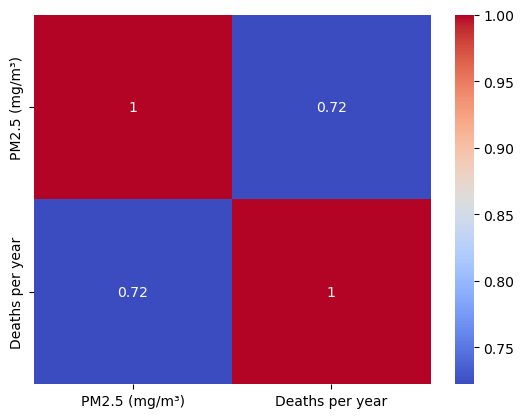

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation
correlation = df.corr(numeric_only=True)

print(correlation)

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## Interpretation of the graph showing the heatmap 
- There is a positive correlation of .72 between **PM2.5** levels and **Number of deaths recorded per year**
- This conforms to the other plots shown above.


## Generating Pie Chart to understand distribution

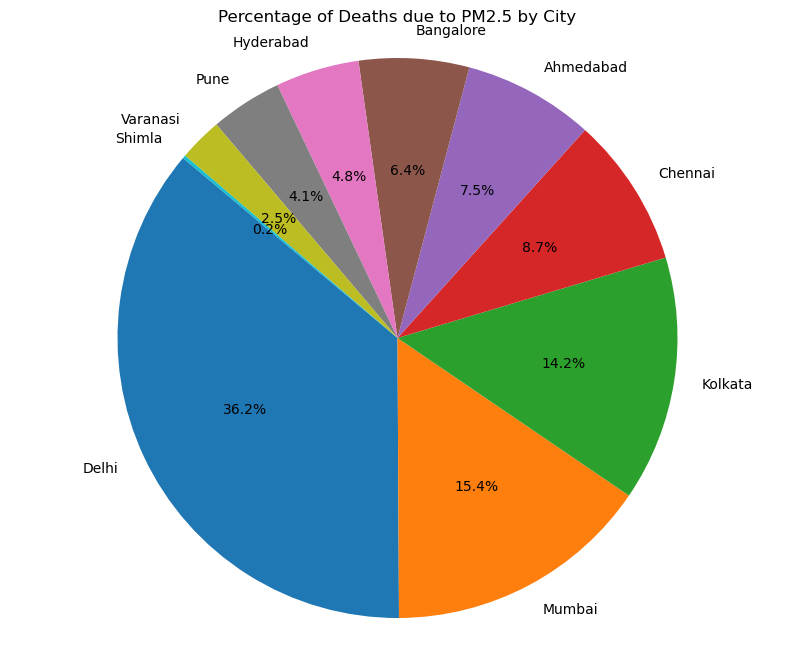

In [6]:


# Calculating the percentage of deaths due to PM2.5 for each city
total_deaths = df["Deaths per year"].sum()
df["Percentage of deaths"] = (df["Deaths per year"] / total_deaths) * 100

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(df["Percentage of deaths"], labels=df["City"], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Deaths due to PM2.5 by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Interpretation of the pie chart 

- Delhi, Mumbai and Kolkata are the worst affected areas
- They cover almost 2/3rd of the totsl number of deaths caused by PM2.5 pollution effect.

## Collecting data for percentage change (extracted from data)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot extracted from the document
pm25 = np.array([20, 40, 60, 80, 100, 120, 140, 160], dtype='float64')
percent_change = np.array([0.2, 0.4, 0.8, 1.2, 1.5, 1.7, 1.9, 2.0], dtype='float64')  # Example data points
ci_lower_bound = percent_change - np.array([0.1, 0.15, 0.3, 0.35, 0.45, 0.55, 0.65, 0.75], dtype='float64')
ci_upper_bound = percent_change + np.array([0.1, 0.15, 0.3, 0.35, 0.45, 0.55, 0.65, 0.75], dtype='float64')


## Integrated Exposure-Response (2-day Moving Average) 

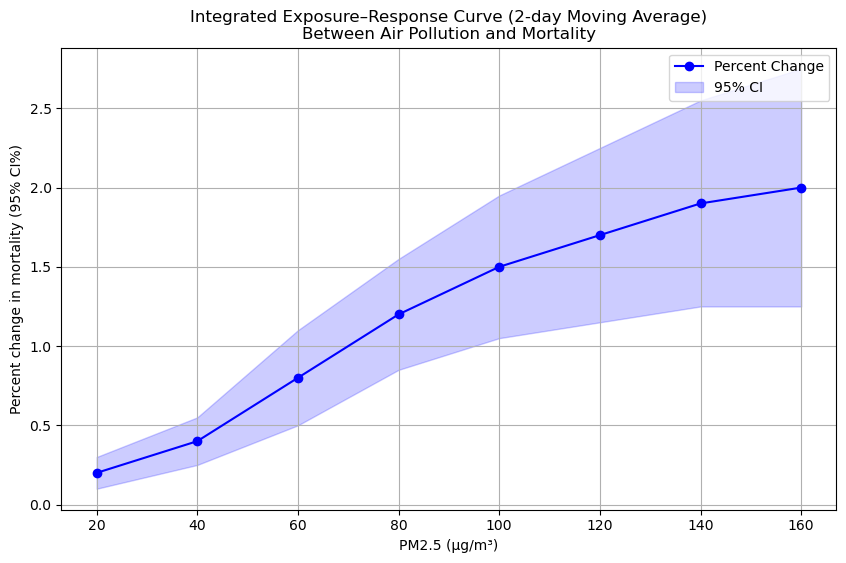

In [2]:

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(pm25, percent_change, marker='o', linestyle='-', color='b', label='Percent Change')
plt.fill_between(pm25, ci_lower_bound, ci_upper_bound, color='b', alpha=0.2, label='95% CI')

# Add labels and title
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Percent change in mortality (95% CI%)")
plt.title("Integrated Exposure–Response Curve (2-day Moving Average)\nBetween Air Pollution and Mortality")
plt.legend()
plt.grid(True)
plt.show()


## Interpretation
The plot demonstrates that short-term exposure to PM2.5 is associated with an increased risk of mortality, even at concentrations below the current Indian standard of 60 µg/m³. The steep slope at lower levels of PM2.5 exposure indicates that reducing PM2.5 concentrations, even slightly, can have significant public health benefits by reducing mortality rates.